# PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA)


## Load dữ liệu & thống kê tổng quan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Robust sys.path so `src` is importable
p = Path.cwd()
for _ in range(6):
    if (p / 'src').exists():
        sys.path.insert(0, str(p))
        break
    p = p.parent
else:
    sys.path.insert(0, str(Path.cwd()))

from src.preprocessing import robust_read_processed, clean_numeric_columns

# Load processed dataset (prefer canonical data/processed_data.csv)
try:
    df, sep = robust_read_processed('data/processed_data.csv')
    print('Loaded processed_data.csv with sep', sep)
except FileNotFoundError:
    # Fallback: try sample
    df, sep = robust_read_processed('data/sample/processed_sample.csv')
    print('Loaded sample processed file with sep', sep)

# Normalize numeric columns
df = clean_numeric_columns(df, cols=['TOTALBASKET','UNITPRICE','TOTALPRICE','AMOUNT'])

# Sample display
df.head()

,ORDERID,ORDERDETAILID,AMOUNT,UNITPRICE,TOTALPRICE,ITEMID,ITEMCODE,BRANCH_ID,DATE_,USERID,...,USERGENDER,USERBIRTHDATE,REGION,CITY,TOWN,DISTRICT,ADDRESSTEXT,Year,Month,Age
0,6420952,32112344,4,95.40,422.36,10296,11170,33-AF2,2023-05-17,54220,...,E,1981-11-17,Ege,Afyonkarahisar,BOLVADİN,KONAK MAH.,KONAK MAH. GÜLSU SOKAK 03300 BOLVADİN/AFYONK...,2023,5,44
1,7219622,36109907,3,15.00,49.05,5123,25003,146-KA3,2023-06-12,84912,...,K,1988-01-24,Akdeniz,Kahramanmaraş,KAHRAMANMARAŞ MERKEZ,ŞEHİT ABDULLAH ÇAVUŞ MAH.,ŞEHİT ABDULLAH ÇAVUŞ MAH. 66005. SOKAK KAHR...,2023,6,37
2,4159842,20801845,3,7.85,14.22,5492,6167,421-DI2,2021-06-17,76879,...,E,1977-09-17,Güneydoğu Anadolu,Diyarbakır,HANİ,ÇARDAKLI KÖYÜ,ÇARDAKLI KÖYÜ MAH. KÖYÜN KENDİSİ 21800 HANİ/...,2021,6,48
3,7594409,37983589,4,8.70,28.16,1264,2787,472-BA1,2021-12-20,61129,...,K,1969-03-07,Güneydoğu Anadolu,Batman,GERCÜŞ,BAĞLARBAŞI MAH.,BAĞLARBAŞI MAH. 118. SOKAK 72300 GERCÜŞ/BATMAN,2021,12,56
4,7283856,36430669,3,57.25,164.34,16277,29876,427-GA3,2022-02-28,25971,...,K,1989-08-17,Güneydoğu Anadolu,Gaziantep,ŞEHİTKAMİL,8 ŞUBAT MAH.,8 ŞUBAT MAH. 82046 NOLU SOKAK 27500 ŞEHİTKAM...,2022,2,36


In [ ]:
df.shape

(50000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ORDERID        50000 non-null  int64  
 1   ORDERDETAILID  50000 non-null  int64  
 2   AMOUNT         50000 non-null  int64  
 3   UNITPRICE      50000 non-null  float64
 4   TOTALPRICE     50000 non-null  float64
 5   ITEMID         50000 non-null  int64  
 6   ITEMCODE       50000 non-null  int64  
 7   BRANCH_ID      50000 non-null  object 
 8   DATE_          50000 non-null  object 
 9   USERID         50000 non-null  int64  
 10  NAMESURNAME_x  50000 non-null  object 
 11  TOTALBASKET    50000 non-null  float64
 12  USERNAME_      50000 non-null  object 
 13  NAMESURNAME_y  50000 non-null  object 
 14  STATUS_        50000 non-null  int64  
 15  USERGENDER     50000 non-null  object 
 16  USERBIRTHDATE  50000 non-null  object 
 17  REGION         50000 non-null  object 
 18  CITY  

Thống kê mô tả dữ liệu số

In [ ]:
df.describe()


,ORDERID,ORDERDETAILID,AMOUNT,UNITPRICE,TOTALPRICE,ITEMID,ITEMCODE,USERID,TOTALBASKET,STATUS_,Year,Month,Age
count,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.00000
mean,5.091253e+06,2.546100e+07,4.480120,64.874439,254.699792,13445.080220,22101.06636,50441.272220,1612.380528,1.0,2021.843780,5.99416,50.38858
std,2.940057e+06,1.470405e+07,2.294208,116.372245,560.686983,7804.910189,12556.93023,28838.330538,1540.739186,0.0,0.764792,3.36038,14.45647
min,5.430000e+02,2.643000e+03,1.000000,0.000000,0.000000,1.000000,5.00000,4.000000,0.000000,1.0,2021.000000,1.00000,26.00000
25%,2.562807e+06,1.281603e+07,2.000000,15.600000,42.490000,6701.750000,11288.50000,25718.250000,710.447500,1.0,2021.000000,3.00000,38.00000
50%,5.084075e+06,2.542386e+07,4.000000,35.700000,115.500000,13431.500000,21939.00000,50759.000000,1278.410000,1.0,2022.000000,6.00000,50.00000
75%,7.599759e+06,3.801053e+07,6.000000,78.000000,287.040000,20239.250000,32483.00000,75250.000000,2113.340000,1.0,2022.000000,9.00000,63.00000
max,1.023502e+07,5.118413e+07,8.000000,6302.300000,54188.080000,27000.000000,45157.00000,99985.000000,54953.500000,1.0,2023.000000,12.00000,75.00000


## Tạo biến target & kiểm tra phân bố

In [3]:
ALPHA = 0.7

df['ESTIMATED_COST'] = df['UNITPRICE'] * df['AMOUNT'] * ALPHA
df['PROFIT'] = df['TOTALPRICE'] - df['ESTIMATED_COST']
df['IS_PROFIT'] = (df['PROFIT'] > 0).astype(int)

df['IS_PROFIT'].value_counts(normalize=True)


,proportion
IS_PROFIT,
1,0.70798
0,0.29202


## Biểu đồ

1. Biểu đồ Phân bố đơn hàng sinh lời

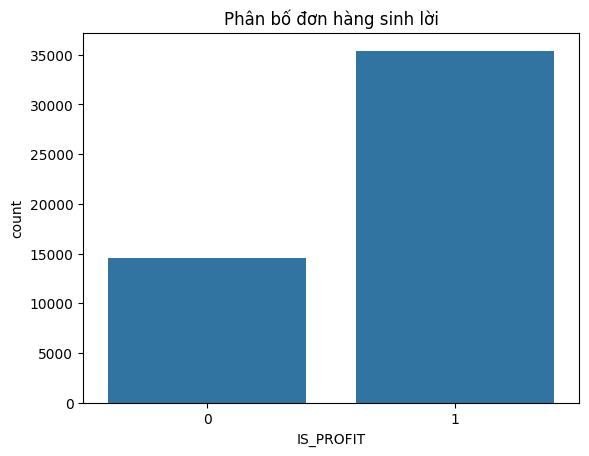

In [ ]:
sns.countplot(x='IS_PROFIT', data=df)
plt.title("Phân bố đơn hàng sinh lời")
plt.show()


## Phân tích mối quan hệ giữa biến số & sinh lời

1. Số lượng mua (AMOUNT)

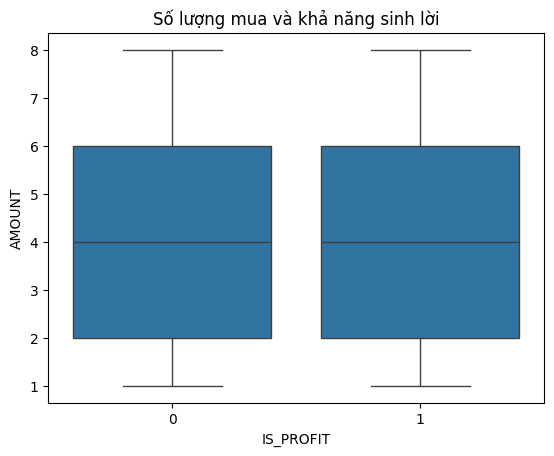

In [ ]:
sns.boxplot(x='IS_PROFIT', y='AMOUNT', data=df)
plt.title("Số lượng mua và khả năng sinh lời")
plt.show()

2. Đơn giá (UNITPRICE)

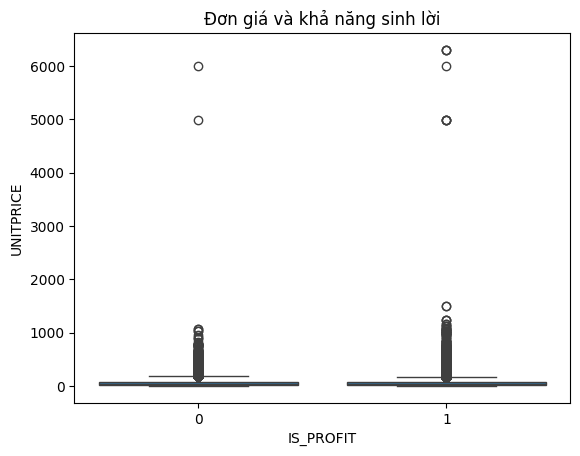

In [ ]:
sns.boxplot(x='IS_PROFIT', y='UNITPRICE', data=df)
plt.title("Đơn giá và khả năng sinh lời")
plt.show()


3. Tuổi khách hàng (Age)

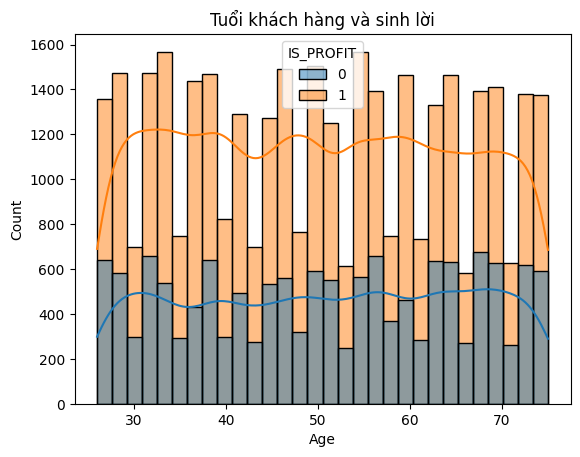

In [ ]:
sns.histplot(data=df, x='Age', hue='IS_PROFIT', bins=30, kde=True)
plt.title("Tuổi khách hàng và sinh lời")
plt.show()


## Phân tích yếu tố thời gian

1. Theo tháng

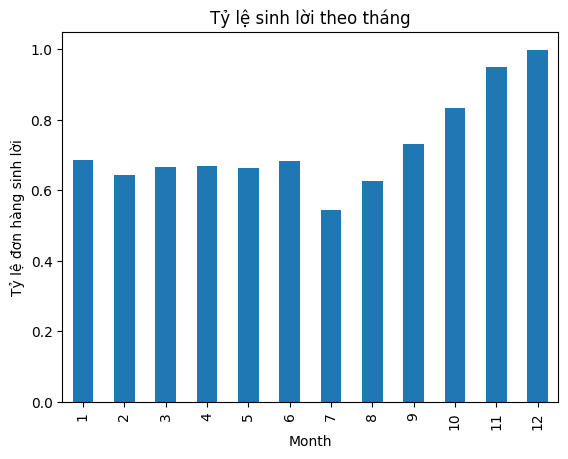

In [ ]:
profit_by_month = df.groupby('Month')['IS_PROFIT'].mean()

profit_by_month.plot(kind='bar')
plt.ylabel("Tỷ lệ đơn hàng sinh lời")
plt.title("Tỷ lệ sinh lời theo tháng")
plt.show()


2. Theo Năm

Text(0.5, 1.0, 'Số lượng đơn hàng theo năm')

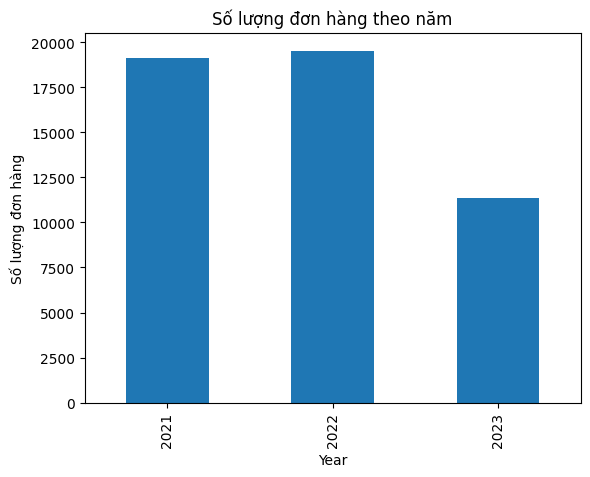

In [ ]:
orders_by_year = df['Year'].value_counts().sort_index()

orders_by_year.plot(kind='bar')
plt.ylabel("Số lượng đơn hàng")
plt.title("Số lượng đơn hàng theo năm")

## Phân tích theo địa lý

1. Theo thành phố

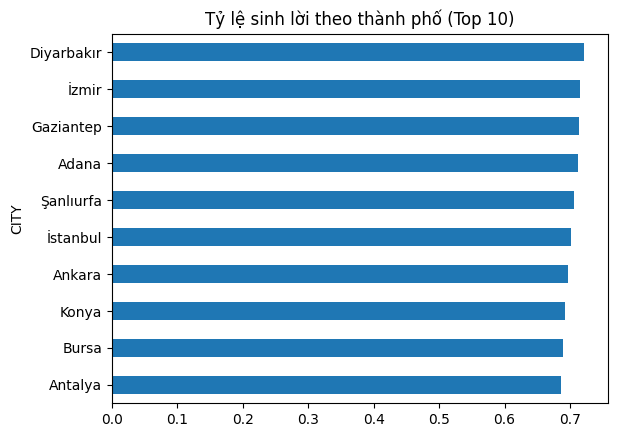

In [ ]:
top_cities = df['CITY'].value_counts().head(10).index

city_profit = df[df['CITY'].isin(top_cities)].groupby('CITY')['IS_PROFIT'].mean()

city_profit.sort_values().plot(kind='barh')
plt.title("Tỷ lệ sinh lời theo thành phố (Top 10)")
plt.show()


## Ma trận tương quan

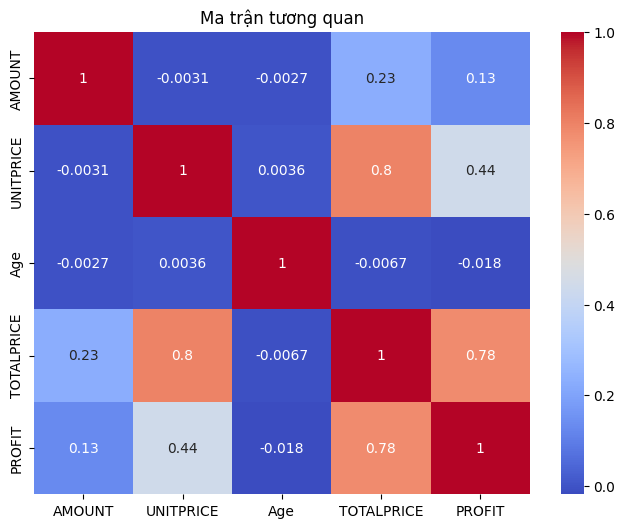

In [ ]:
numeric_cols = ['AMOUNT', 'UNITPRICE', 'Age', 'TOTALPRICE', 'PROFIT']

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan")
plt.show()


In [4]:
df.columns

Index(['ORDERID', 'ORDERDETAILID', 'AMOUNT', 'UNITPRICE', 'TOTALPRICE',
       'ITEMID', 'ITEMCODE', 'BRANCH_ID', 'DATE_', 'USERID', 'NAMESURNAME_x',
       'TOTALBASKET', 'USERNAME_', 'NAMESURNAME_y', 'STATUS_', 'USERGENDER',
       'USERBIRTHDATE', 'REGION', 'CITY', 'TOWN', 'DISTRICT', 'ADDRESSTEXT',
       'Year', 'Month', 'Age', 'ESTIMATED_COST', 'PROFIT', 'IS_PROFIT'],
      dtype='object')

In [5]:
df.columns = df.columns.str.upper().str.strip()
df.columns

Index(['ORDERID', 'ORDERDETAILID', 'AMOUNT', 'UNITPRICE', 'TOTALPRICE',
       'ITEMID', 'ITEMCODE', 'BRANCH_ID', 'DATE_', 'USERID', 'NAMESURNAME_X',
       'TOTALBASKET', 'USERNAME_', 'NAMESURNAME_Y', 'STATUS_', 'USERGENDER',
       'USERBIRTHDATE', 'REGION', 'CITY', 'TOWN', 'DISTRICT', 'ADDRESSTEXT',
       'YEAR', 'MONTH', 'AGE', 'ESTIMATED_COST', 'PROFIT', 'IS_PROFIT'],
      dtype='object')

# Huấn luyện mô hình





In [6]:
target = 'IS_PROFIT'

features = [
    'AMOUNT',
    'UNITPRICE',
    'AGE',
    'MONTH',
    'CITY',
    'DISTRICT',
    'ITEMCODE',
    'BRANCH_ID'
]

X = df[features]
y = df[target]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = [
    'AMOUNT',
    'UNITPRICE',
    'AGE',
    'MONTH'
]

categorical_features = [
    'CITY',
    'DISTRICT',
    'ITEMCODE',
    'BRANCH_ID'
]

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


## 1. Random Forest

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(
            n_estimators=200,
            class_weight='balanced',
            max_depth=12,
            random_state=42,
            n_jobs=-1
        ))
    ]
)




rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

print("RANDOM FOREST")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


RANDOM FOREST
              precision    recall  f1-score   support

           0       0.37      0.90      0.52      2920
           1       0.90      0.37      0.53      7080

    accuracy                           0.53     10000
   macro avg       0.63      0.63      0.53     10000
weighted avg       0.74      0.53      0.53     10000

[[2618  302]
 [4443 2637]]


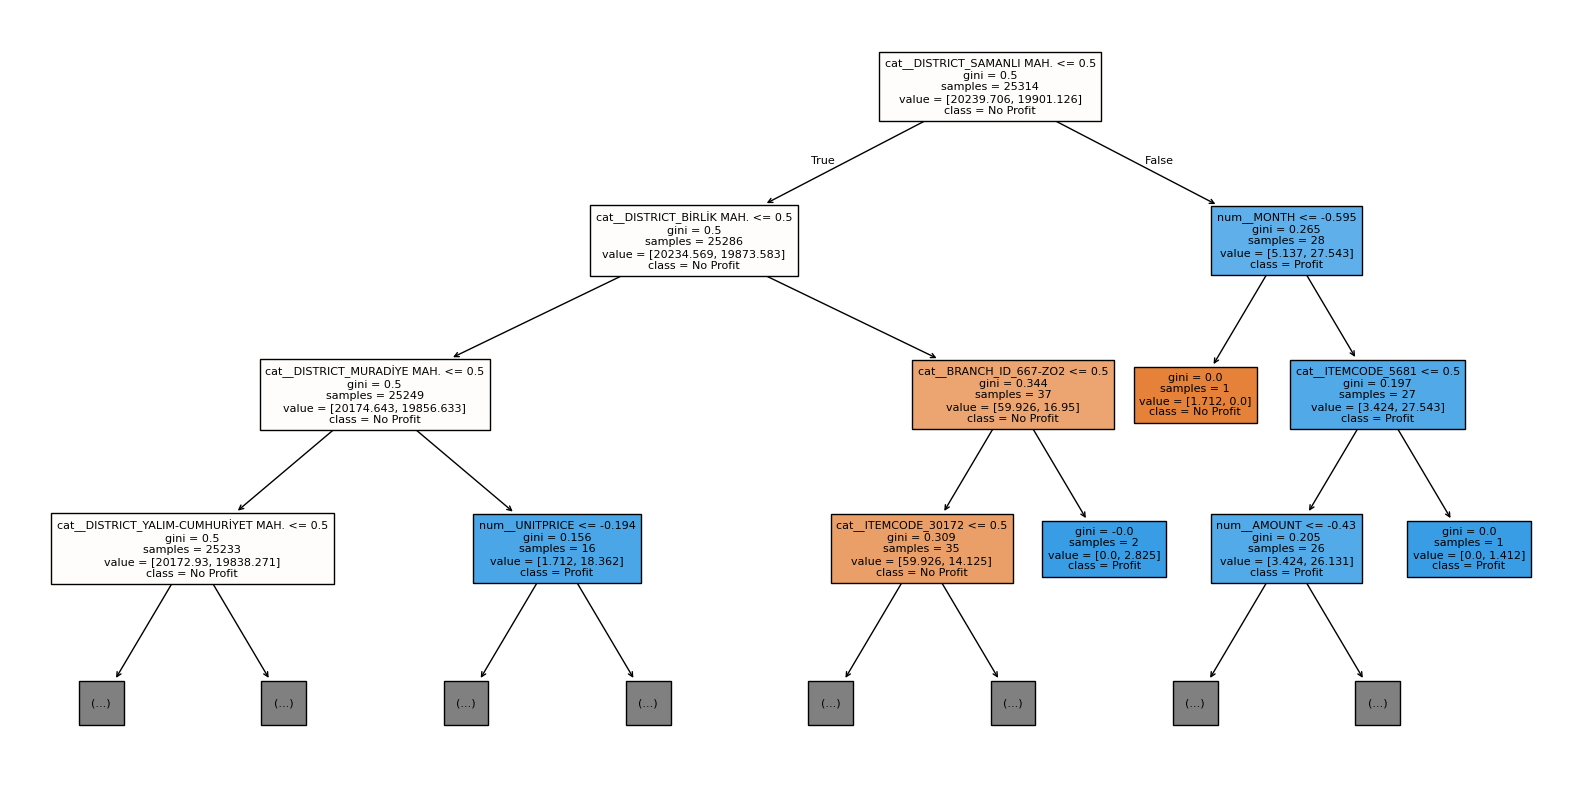

In [25]:
from sklearn.tree import plot_tree

tree = rf_model.estimators_[0]
feature_names = rf_pipeline.named_steps['preprocess'].get_feature_names_out()
plt.figure(figsize=(20, 10))

plot_tree(
    tree,
    feature_names=feature_names,
    class_names=['No Profit', 'Profit'],  # sửa theo nhãn y của bạn
    filled=True,
    max_depth=3,   # CHỈ VẼ 3 TẦNG
    fontsize=8
)

plt.show()


## 2. XGBoost

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=ratio,
    class_weight='balanced',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', xgb_model)
    ]
)
xgb_pipeline.fit(X_train, y_train)

y_pred_xgb = xgb_pipeline.predict(X_test)


print("XGBOOST CLASSIFIER")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:27:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBOOST CLASSIFIER
              precision    recall  f1-score   support

           0       0.40      0.88      0.55      2920
           1       0.90      0.46      0.61      7080

    accuracy                           0.58     10000
   macro avg       0.65      0.67      0.58     10000
weighted avg       0.76      0.58      0.59     10000

[[2570  350]
 [3825 3255]]


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

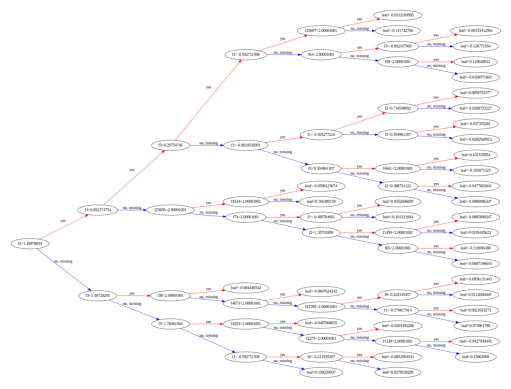

In [15]:
xgb_model = xgb_pipeline.named_steps['model']
from xgboost import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plot_tree(
    xgb_model,
    num_trees=0,     # cây thứ 0
    rankdir='LR'     # vẽ từ trái → phải
)

plt.show()


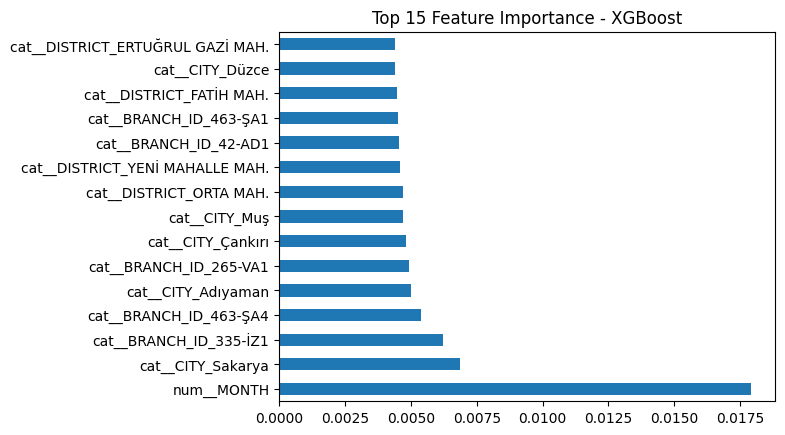

In [17]:
import matplotlib.pyplot as plt

# Lấy model sau khi train
xgb_fitted = xgb_pipeline.named_steps['model']

# Lấy tên feature sau one-hot
feature_names = xgb_pipeline.named_steps['preprocess'].get_feature_names_out()

importances = xgb_fitted.feature_importances_

feat_imp = pd.Series(importances, index=feature_names)
feat_imp.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title("Top 15 Feature Importance - XGBoost")
plt.show()


## Đánh giá mô hình: Random Forest & XGBoost

In [18]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}


In [19]:
from sklearn.model_selection import cross_validate
rf_cv_results = cross_validate(
    rf_pipeline,
    X,
    y,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)

rf_results = {
    'Model': 'Random Forest',
    'Accuracy': rf_cv_results['test_accuracy'].mean(),
    'F1-score': rf_cv_results['test_f1'].mean(),
    'ROC-AUC': rf_cv_results['test_roc_auc'].mean()
}

rf_results


{'Model': 'Random Forest',
 'Accuracy': np.float64(0.54524),
 'F1-score': np.float64(0.5600062693884947),
 'ROC-AUC': np.float64(0.7289384571643629)}

In [20]:
xgb_cv_results = cross_validate(
    xgb_pipeline,
    X,
    y,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
)

xgb_results = {
    'Model': 'XGBoost',
    'Accuracy': xgb_cv_results['test_accuracy'].mean(),
    'F1-score': xgb_cv_results['test_f1'].mean(),
    'ROC-AUC': xgb_cv_results['test_roc_auc'].mean()
}

xgb_results


{'Model': 'XGBoost',
 'Accuracy': np.float64(0.57682),
 'F1-score': np.float64(0.6017349127498546),
 'ROC-AUC': np.float64(0.7504796609808247)}

In [21]:
results_df = pd.DataFrame([rf_results, xgb_results])
results_df


,Model,Accuracy,F1-score,ROC-AUC
0,Random Forest,0.54524,0.560006,0.728938
1,XGBoost,0.57682,0.601735,0.750480


In [22]:
from sklearn.metrics import roc_auc_score
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("RANDOM FOREST – TEST SET")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


RANDOM FOREST – TEST SET
              precision    recall  f1-score   support

           0       0.37      0.90      0.52      2920
           1       0.90      0.37      0.53      7080

    accuracy                           0.53     10000
   macro avg       0.63      0.63      0.53     10000
weighted avg       0.74      0.53      0.53     10000

ROC-AUC: 0.7175674531769987


In [23]:
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

print("XGBOOST – TEST SET")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:31:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBOOST – TEST SET
              precision    recall  f1-score   support

           0       0.40      0.88      0.55      2920
           1       0.90      0.46      0.61      7080

    accuracy                           0.58     10000
   macro avg       0.65      0.67      0.58     10000
weighted avg       0.76      0.58      0.59     10000

ROC-AUC: 0.7457503531073447
